In [1]:
from subprocess import check_output
print(check_output(['ls','./input']).decode('utf8'))

predict.csv
predict1.csv
sample_submission.csv
test.csv
train.csv



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

In [3]:
Data=pd.read_csv('./input/train.csv')

In [4]:
Data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Data.shape

(42000, 785)

In [6]:
label=Data['label']

In [7]:
train=Data.iloc[:,1:]

In [8]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
im=train.iloc[1].as_matrix().reshape(28,28)

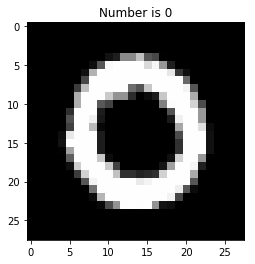

In [10]:
plt.imshow(im,cmap='gray',interpolation='nearest')
plt.title('Number is %i'%label[1])
plt.show()

# Training with SVM

In [11]:
clf=svm.SVC()
clf.fit(train.iloc[:1000],label.iloc[:1000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred=clf.predict(train[:1000])

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
cnf_matrix=confusion_matrix(label[:1000],y_pred)

In [15]:
cnf_matrix

array([[107,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  96,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 124,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 102,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  89,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  97,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 105,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  93,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97]])

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA(n_components=32,whiten=True)
train_r=pca.fit_transform(train)

In [18]:
train_r.shape

(42000, 32)

In [19]:
clf1=svm.SVC()
clf1.fit(train_r,label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred1=clf1.predict(train_r)

In [21]:
cnf1_matrix=confusion_matrix(label,y_pred1)

In [22]:
cnf1_matrix

array([[4124,    0,    0,    0,    1,    1,    2,    0,    2,    2],
       [   0, 4663,    8,    0,    2,    0,    0,    7,    2,    2],
       [   2,    2, 4147,    3,    4,    0,    0,   12,    4,    3],
       [   1,    0,   14, 4282,    0,   24,    0,   10,   14,    6],
       [   3,    3,    0,    0, 4035,    0,    4,    3,    1,   23],
       [   4,    1,    0,   14,    2, 3761,    6,    0,    3,    4],
       [   1,    1,    1,    0,    4,    6, 4123,    0,    1,    0],
       [   2,   15,   17,    1,    9,    0,    0, 4344,    0,   13],
       [   3,   10,    8,   10,    4,    7,    3,    4, 4010,    4],
       [   4,    4,    2,    9,   23,    8,    2,   22,    4, 4110]])

In [23]:
test=pd.read_csv('./input/test.csv')

In [24]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
pca1=PCA(n_components=32,whiten=True)
test_r=pca1.fit_transform(test)

In [26]:
y_test=clf1.predict(test_r)

In [27]:
len(y_test)

28000

In [28]:
print("Saving the value")
with open('./input/predict.csv','w') as writer:
    writer.write('ImageId,Label\n')
    cont=0
    for i in y_test:
        cont+=1
        writer.write(str(cont)+','+str(i)+'\n')


Saving the value


# K-Mean 

In [31]:
from sklearn.neural_network import MLPClassifier

In [34]:
clf2=MLPClassifier()

In [35]:
clf2=clf2.fit(train_r,label)

In [36]:
clf2

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [38]:
y_pred1=clf2.predict(test_r)

In [39]:
print("Saving the value")
with open('./input/predict.csv','w') as writer:
    writer.write('ImageId,Label\n')
    cont=0
    for i in y_pred1:
        cont+=1
        writer.write(str(cont)+','+str(i)+'\n')

Saving the value
